In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
df=pd.read_csv("TwitterHate.csv")
print(df.shape)


(31962, 3)


In [3]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [4]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


(array([29720.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2242.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

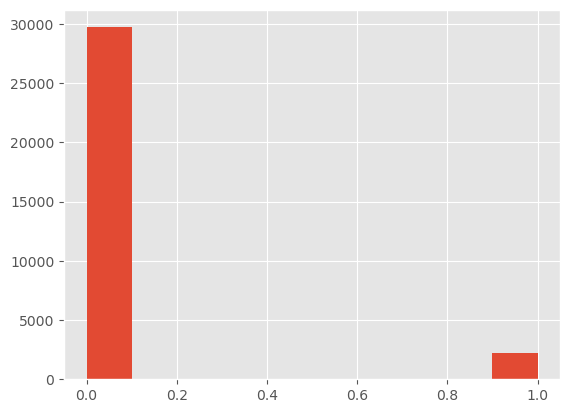

In [5]:
plt.hist(df['label'])

In [6]:
df["labels"]=df['label'].map({0:'no hate speech',1:'hate speech detected'})
df.head()

,id,label,tweet,labels
0,1,0,@user when a father is dysfunctional and is s...,no hate speech
1,2,0,@user @user thanks for #lyft credit i can't us...,no hate speech
2,3,0,bihday your majesty,no hate speech
3,4,0,#model i love u take with u all the time in ...,no hate speech
4,5,0,factsguide: society now #motivation,no hate speech


In [7]:
import re
import nltk
import string
from nltk.util import pr
from nltk.corpus import stopwords
stopword =set(stopwords.words("english"))
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
pst_stem=PorterStemmer()
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [8]:
def clean(text):
    text=str(text).lower() 
    text=re.sub('\([<.*?>:;)]','',text)
    text=re.sub('https?:/\S+|www.\S+','',text)
    text=re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text=re.sub('\n', '',text)
    text=re.sub(r'\w*\d\w*','',text)
    text=re.sub('ð\S+','',text)
    text= word_tokenize(text)
    
    text= [word for word in text if  word not in stopword]
    text=[pst_stem.stem(word) for word in text]
    
    text=" ".join(text)
    return text
df["tweet"] = df["tweet"].apply(clean)
print(df.head())

   id  label                                              tweet  \
0   1      0  user father dysfunct selfish drag kid dysfunct...   
1   2      0  user user thank lyft credit cant use caus dont...   
2   3      0                                     bihday majesti   
3   4      0                        model love u take u time ur   
4   5      0                            factsguid societi motiv   

           labels  
0  no hate speech  
1  no hate speech  
2  no hate speech  
3  no hate speech  
4  no hate speech  


In [9]:
def lemmatizing(data):
    tweet = [lemmatizer.lemmatize(word) for word in data]
    tweet="".join(tweet)
    return tweet
df['tweet'] = df['tweet'].apply(lemmatizing)

In [10]:
df.head()

,id,label,tweet,labels
0,1,0,user father dysfunct selfish drag kid dysfunct...,no hate speech
1,2,0,user user thank lyft credit cant use caus dont...,no hate speech
2,3,0,bihday majesti,no hate speech
3,4,0,model love u take u time ur,no hate speech
4,5,0,factsguid societi motiv,no hate speech


<Axes: xlabel='label', ylabel='count'>

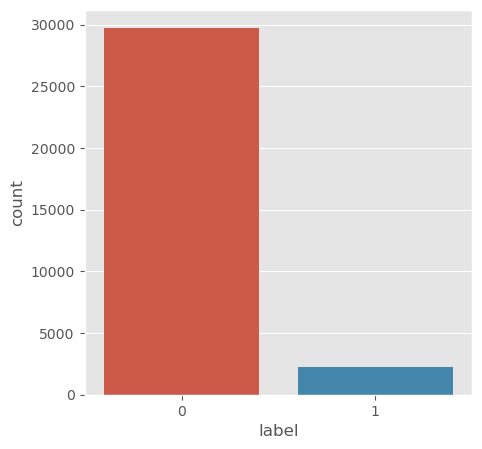

In [11]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='label', data = df)

<Axes: ylabel='label'>

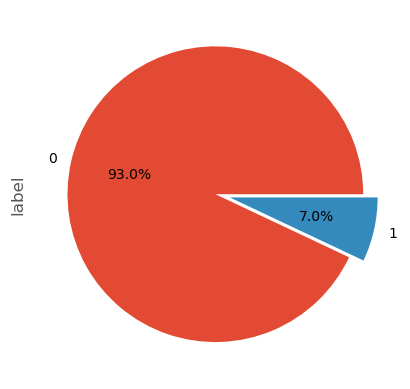

In [12]:
df['label'].value_counts().plot(kind='pie',explode=(0,0.1),autopct = '%1.1f%%')

In [13]:
print("total ",len(df))
no_hate=df[df.label==0]
print("no hate",len(no_hate))
hate=df[df.label==1]
print("hate",len(hate))

total  31962
no hate 29720
hate 2242


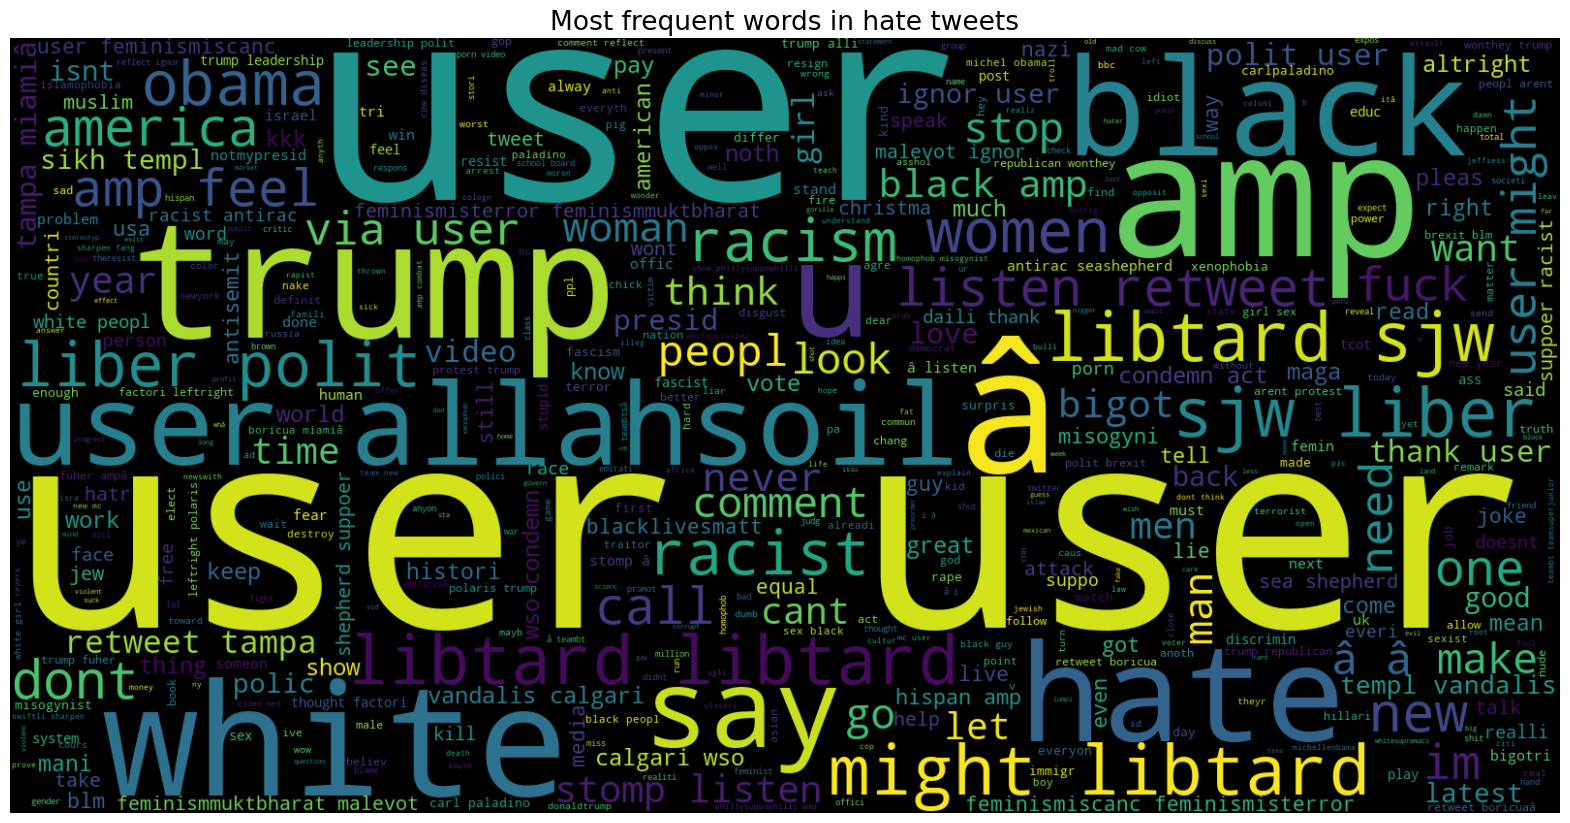

In [14]:
from wordcloud import WordCloud
hate_tweets=df[df.label==1]
hate_tweets.head()
text = ' '.join([word for word in hate_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in hate tweets', fontsize = 19)
plt.show()

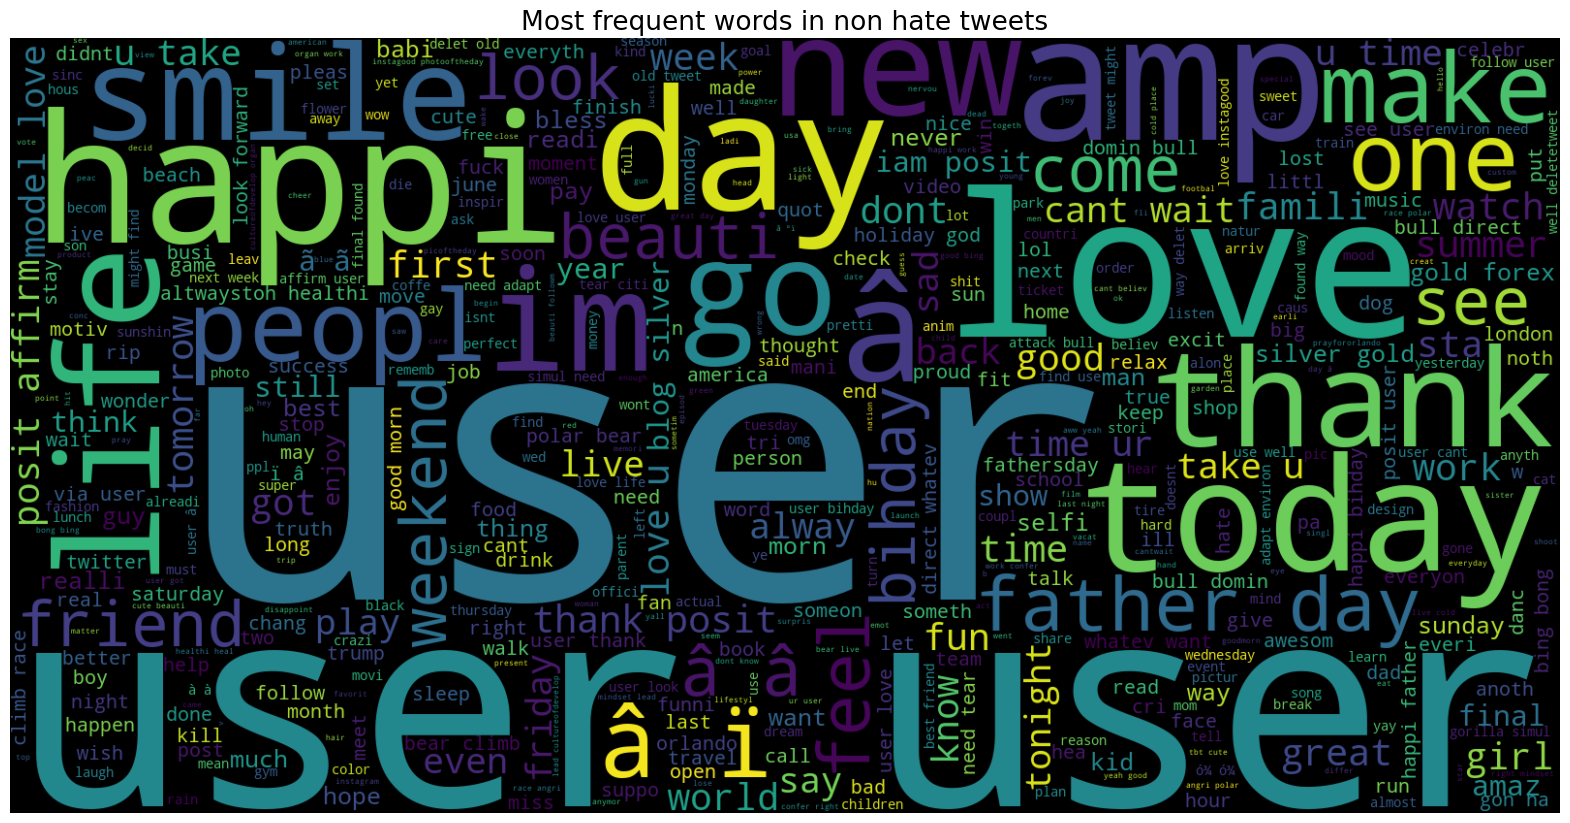

In [15]:
from wordcloud import WordCloud
no_hate_tweets=df[df.label==0]
hate_tweets.head()
text = ' '.join([word for word in no_hate_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in non hate tweets', fontsize = 19)
plt.show()

In [16]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [17]:
x=np.array(df["tweet"])
y=np.array(df["labels"])


cv=CountVectorizer()
x=cv.fit_transform(x)

accuracy=[]
name=[]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=54)

clf=LogisticRegression()
clf.fit(x_train,y_train)
predict=clf.predict(x_test)
print("logistic",accuracy_score(y_test,predict))
accuracy.append(accuracy_score(y_test,predict))
name.append("Logistic")
print("CLASSIFICATION REPORT \n",classification_report(y_test,predict))



clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
predict=clf.predict(x_test)
print("TREE",accuracy_score(y_test,predict))
accuracy.append(accuracy_score(y_test,predict))
name.append("decision_tree")
print("CLASSIFICATION REPORT \n",classification_report(y_test,predict))


clf=RandomForestClassifier()
clf.fit(x_train,y_train)
predict=clf.predict(x_test)
print("RNN",accuracy_score(y_test,predict))
accuracy.append(accuracy_score(y_test,predict))
name.append("RNN")
print("CLASSIFICATION REPORT \n",classification_report(y_test,predict))

clf=SVC()
clf.fit(x_train,y_train)
predict=clf.predict(x_test)
print("SVM",accuracy_score(y_test,predict))
accuracy.append(accuracy_score(y_test,predict))
name.append("SVM")
print("CLASSIFICATION REPORT \n",classification_report(y_test,predict))


C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


logistic 0.9590155386380227
CLASSIFICATION REPORT 
                       precision    recall  f1-score   support

hate speech detected       0.85      0.50      0.63       665
      no hate speech       0.96      0.99      0.98      8924

            accuracy                           0.96      9589
           macro avg       0.91      0.75      0.80      9589
        weighted avg       0.96      0.96      0.95      9589

TREE 0.9465011992908541
CLASSIFICATION REPORT 
                       precision    recall  f1-score   support

hate speech detected       0.63      0.56      0.59       665
      no hate speech       0.97      0.98      0.97      8924

            accuracy                           0.95      9589
           macro avg       0.80      0.77      0.78      9589
        weighted avg       0.94      0.95      0.95      9589

RNN 0.9622484096360413
CLASSIFICATION REPORT 
                       precision    recall  f1-score   support

hate speech detected       0.90      0.5

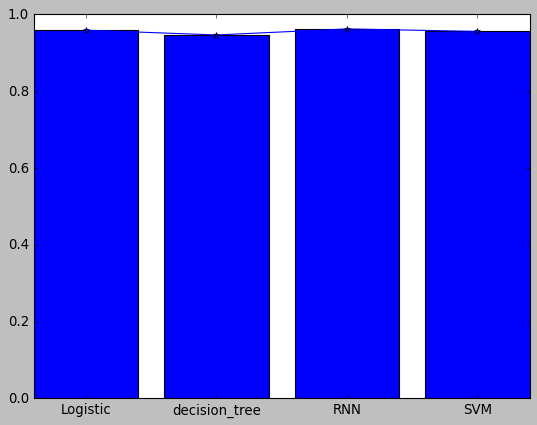

In [18]:

name
accuracy
style.use('classic')
plt.bar(name,accuracy)
plt.plot(accuracy,marker='*')


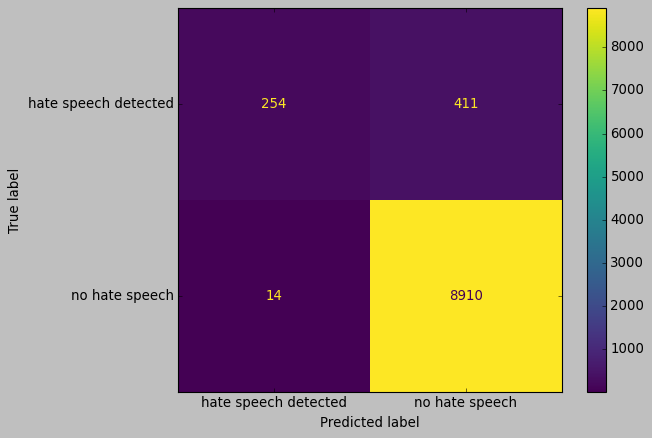

In [19]:
style.use('classic')
cm = confusion_matrix(y_test,predict, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()